In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pickle
import os
import itertools
import datetime
import random
import missingno as msno
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
pd.set_option('max_columns', 1000) 

In [2]:
SAVE_PROCESSED_DATA = True

In [3]:
scriptDir = os.getcwd()
relPath = r"../Customer Segmentation/"
sampleFilePath1 = os.path.join(scriptDir, relPath, 'CJ final data.xlsx')
# sampleFilePath2 = os.path.join(scriptDir, relPath, 'CJ GP.xlsx')
relPathOutput = r"../output/"
outputFolderPath = os.path.join(scriptDir, relPathOutput)

In [5]:
cj = pd.read_excel(sampleFilePath1, header=0, encoding='latin1')
# df2 = pd.read_excel(sampleFilePath2, header=0, encoding='latin1')
print('Dataframe dimensions:', df1.shape)
# print('Dataframe dimensions:', df2.shape)

Dataframe dimensions: (8809, 7)


# Data Observation
- Merge two sheet by the 'RawLabel'

In [ ]:
# df3 = pd.merge(df1, df2, on=['Accountid', 'ownerid', 'enqid'], how='left')

|Variable Name: | Variable Description: |
|-- |-- |
|**enqid** | Nominal, a integral number uniquely assiged to ??? ignore |
|**contactid** | Nominal, a integral number uniquely assiged to each order |
|**ownerid** | Nominal,  a integral number uniquely assiged to each distinct operator |
|**companyid** | Nominal,  a integral number uniquely assiged to each distinct company|
|**Industry** | Nomial|
|**Office Country Code** | Nomial, Same as Fiscal|
|**booked date** | Numerical, the day and time when each order was booked|
|**creation date** | Numerical, the day and time when each order was confirmed |
|**Flight date** | Numerical, the day and time when AP received the money|
|**Flight Year** | Numerical|
|**Route Code**| Nomial, the route for each transaction| 
|**Aircraft code**| Nomial, type of aircraft|
|**no of sectors**| Numerical, transit time|
|**passengers** | Numerical, number of passengier|
|**Total Flight Time(Dec)** | Numerical, length of each flight|
|**Total Distance (NMi)** | Numerical, distance for the trip|
|**gross** | Numerical|
|**Gross Margin** | categorical|

**Which features are categorical?**
- Categorical: Office country code, Job status, industrycode, aircraftcode, routecode

**Which are time features?**
- Time feature: booked date, creation date, Flight date, Flight Year

**Which features are numerical?**
- Numerical: no of sectors, passengers, Total Flight Time, Total Distance, gross, cost, Gross Margin

In [ ]:
df3.head()

In [ ]:
df3.info()

**Which features contain blank, null or empty values?**
- Aircraft code > Route code contain a number of null values
- passengers contains a number of 0 values

## Data Cleaning
- Filter the data for CJ department

In [ ]:
df3 = df3[(df3['Product'] != 'Tour Ops')]
df3 = df3.drop(['margin_x', 'data_x', 'data_y'], axis=1)
df3 = df3.rename(columns={'margin_y':'Margin'})

In [ ]:
df3[df3['Margin'] >= 5]

## Assumptions based on data analysis
- Correlating: we want to know how well does each feature correlate with ProfitMargin.We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
- Completing: We might need to complete the columns if it is necessary
- Correlating: 
    1. A lot of features used 0 instead of NULL, but it will affect the model, we may need to fill the 0 with other number.
    2. route code is relatively non-standard as it contains high ratio of duplicate (40%), so maybe dropped.
    3. the combination of aircrafts need to be tranformed to another type of data.
- Creating: 
    1. We may want to create a new feature called round trip based on route code to get the understanding of route
    2. We may want to engineer the office country code to extract the country as a new feature
    3. We may also want to create a discount range feature
    4. Industry columns might have too many categories, and we may need to encode them in another format
- Classifying: We may aslo add to our assumptions based on the problem description noted earlier.
    1. Single trip (Round trip = 0) were more likely to have a better discount.
    2. government were more likely to have a better discount./ sports may have a high limit on the budget.
    3. The SA based country (country=Saudi Arabia) were more likely to have a better discount.

### Creating new feature extracting from existing
- 'Gross Margin'
- 'Country'
- 'Round_trip'

In [ ]:
# cj = cj.rename(columns={'Margin_EnqNo_GBP_CALC':'gross', 'CostToClient_Total_GBP_CALC':'Cost'})

In [ ]:
# def country_tranfrom(dataset):
#     country_mapping = {'IT':'Italy', 'FR':'France', 'DE':'Germany', 'UK':'United Kingdom',
#                        'AT':'Austria', 'US':'United States', 'CH':'Switzerland', 'MC':'Monaco',
#                        'TR':'Turkey', 'SE':'Sweden', 'AE':'United Arab Emirates', 'unknown': 'Other'}
#     dataset['Country'] = dataset['Office Country Code'].map(country_mapping)

# country_tranfrom(cj)

In [ ]:
# cj = cj.dropna(subset=['Route code'])
# cj['Route code'] = cj['Route code'].map(lambda x:str(x))

# Route_code = list(cj['Route code'])
# round_trip = []
# for i in range(len(Route_code)):
#     if Route_code[i][:3] == Route_code[i][-3:]:
#         round_trip.append(1)
#     else:
#         round_trip.append(0)
# cj['Round_trip'] = round_trip

In [ ]:
# cj.to_csv('CJ data.csv')

## Visualize the missing-ness of data

In [ ]:
# cj = pd.read_excel(sampleFilePath, sep=',', header=0, quotechar='"', encoding='latin1')

In [6]:
cj.describe(include=['O'])

,product,brokercountry,owner
count,8809,8809,8809
unique,2,7,62
top,Tour Ops,France,TELFAS
freq,5836,3692,3004


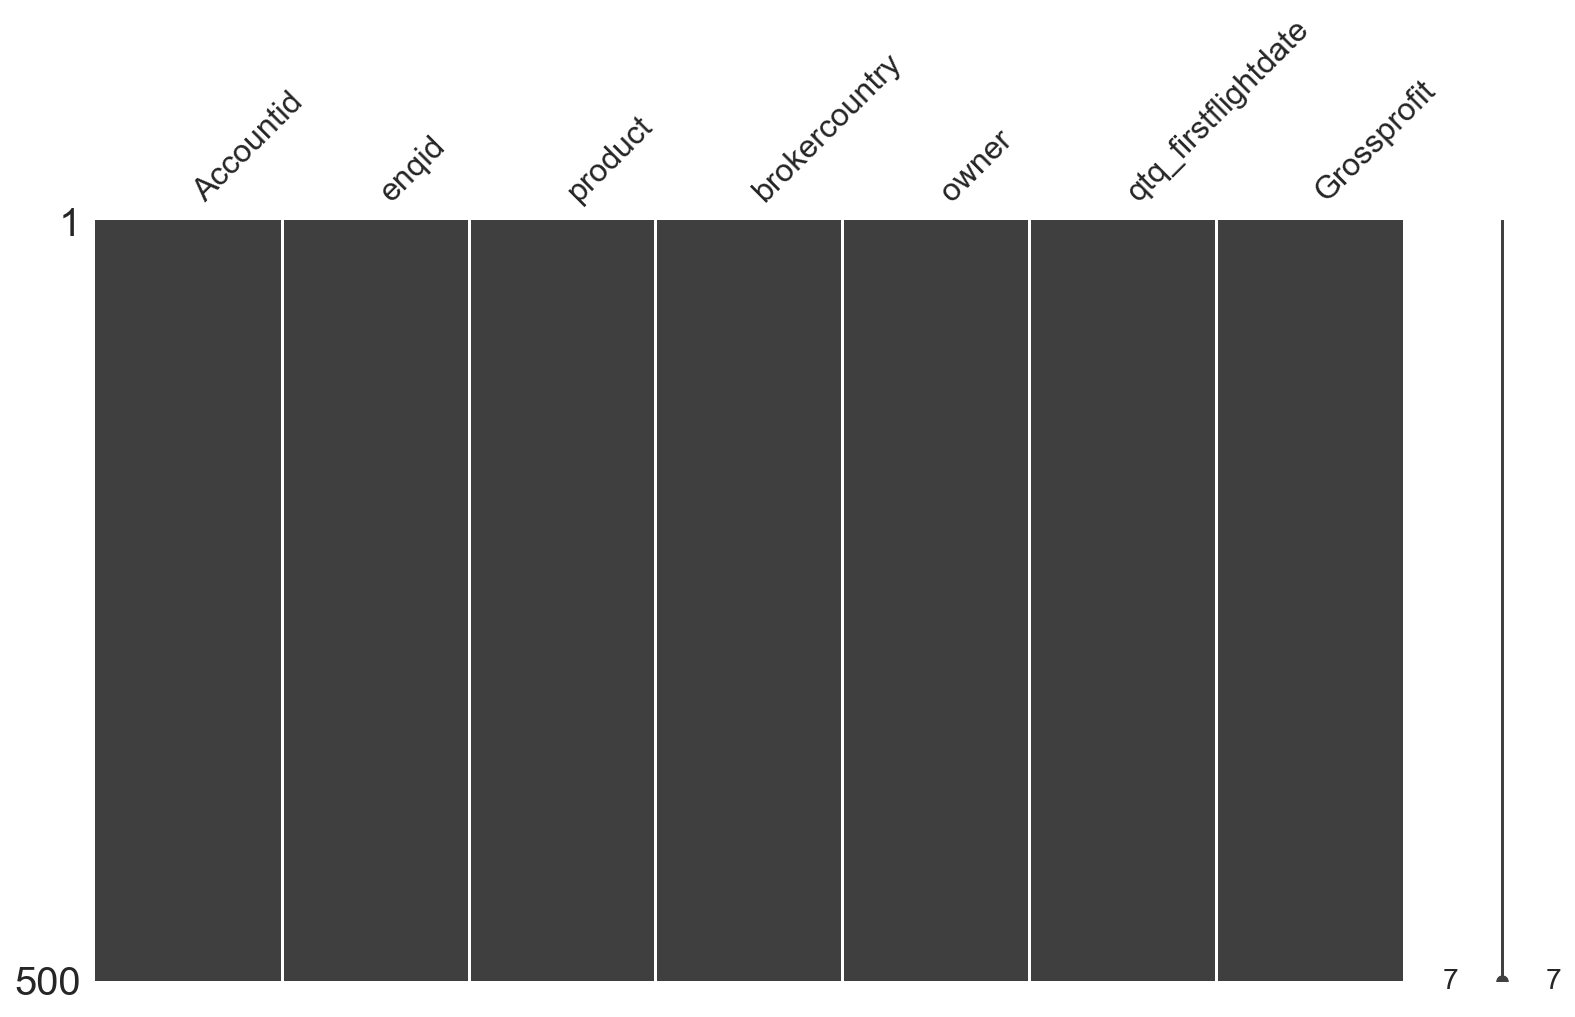

In [7]:
msno.matrix(cj.sample(500),
           figsize=(13,7),
           width_ratios=(15,1))
plt.savefig('msno.png', dpi=72)
plt.show()

In [8]:
tab_info = pd.DataFrame(cj.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(cj.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(cj.isnull().sum()/cj.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
display(tab_info)

,Accountid,enqid,product,brokercountry,owner,qtq_firstflightdate,Grossprofit
column type,int64,int64,object,object,object,datetime64[ns],float64
null values (nb),0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0


### Analyze by pivoting features
To confirm some of our observations and assumptions, we can quickly analyze our feature correlations by pivoting features against each other.
- **Country**: We observe significant average gross contribution from US (classifying#3).
- **Round trip**: We confirm the observation during problem definition that Round trip = 0 had a better gross contribution(classifying#1).
- **Industry**: The feature have a lot of categories. It may be best to derive a feature or a set of features from it.(creating#4)

In [10]:
# cj[['Round_trip', 'gross']].groupby(['Round_trip'], as_index=False).mean().sort_values(by='margin', ascending=False)

In [11]:
# cj[['Industry', 'gross']].groupby(['Industry'], as_index=False).sum().sort_values(by='gross', ascending=False).head()

## Converting the solution goal to be categorical
- check the plasma soup (Profit Margin correlation matrix)
- fill up the Profit Margin col by using the correlation with other cols
- exclude the outliers

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
# categ_col = cj.copy()
# categ_col[['Industry', 'Country']] = categ_col[['Industry', 'Country']].apply(LabelEncoder().fit_transform)

### Completing a numerical continuous feature
We can consider three methods to complete a numerical continuous feature
- A simple way is to generate random numbers between mean and standard deviation.
- More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...
- Combine methods 1 and 2. So instead of guessing null values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.

In [ ]:
# guess_features = np.zeros((2, 11))

In [ ]:
def numerical_complete(colonne):
    for i in range(0, 2):
        for j in range(0, 11):
            guess_df = categ_col[(categ_col['Round_trip'] == i) & \
                                  (categ_col['Country'] == j)][colonne].dropna()

            col_guess = guess_df.median()

            guess_features[i,j] = round(col_guess, 2)

    for i in range(0, 2):
        for j in range(0, 11):
            categ_col.loc[ (categ_col[colonne].isnull()) & (categ_col.Round_trip == i) & (categ_col.Country == j),\
                    colonne] = guess_features[i,j]
            
    return categ_col[colonne]

cj['gross'] = numerical_complete(colonne = 'gross')
cj['Cost'] = numerical_complete(colonne = 'Cost')
cj['passengers'] = numerical_complete(colonne = 'passengers')
cj['Total Flight Time (Dec)'] = numerical_complete(colonne = 'Total Flight Time (Dec)')
cj['Total Distance (NMi)'] = numerical_complete(colonne = 'Total Distance (NMi)')

Now we could create the Profit Margin col since there is no null values in gross and cost cols, and then round them to 2 decimals.

In [ ]:
cj['ProfitMargin(%)'] = round(cj['gross'] / cj['Cost'] * 100, 2)

# set the threshold for the dataset
cj = cj[(cj['ProfitMargin(%)'] > 0.5) & (cj['ProfitMargin(%)'] <= 50) &(cj['gross'] > 100) & (cj['gross'] < 50000)]
cj = cj[(cj['Product'] != 'Other') & (cj['Product'] != 'ACMI') & (cj['Product'] != 'Seat Sales') ]

In [ ]:
cj[['Country', 'gross']].groupby(['Country'], as_index=False).mean().sort_values(by='gross', ascending=False)

In [ ]:
cj['ProfitMargin(%)'].mean()

In [ ]:
cj['gross'].sum()/67*12

In [ ]:
single = cj['gross'][cj.Round_trip == 0]
Round = cj['gross'][cj.Round_trip == 1]
sinlge_median = single.median()
Round_median = Round.median()

plt.figure(figsize=(8,4))
sns.kdeplot(single, shade = False, color='royalblue',
             label = 'SingleTrip_gross')

sns.kdeplot(Round, shade = False, color='firebrick',
             label = 'RoundTrip_gross')

plt.axvline(sinlge_median, color='b',linestyle=":",alpha=0.8) 
plt.text(sinlge_median+3000,  0.00008,'SingleTrip_gross_median: %.1fpound' % (sinlge_median), color = 'b')

plt.axvline(Round_median, color='r',linestyle=":",alpha=0.8) 
plt.text(Round_median+3500,0.00006, 'RoundTrip_gross_median: %.1fpound' % (Round_median), color = 'r')

plt.title("Gross Profit of the Round/Single Trip", fontsize='large', fontweight='bold')
plt.xlabel('Gross Profit of the CJ and Tour Ops Department')
plt.savefig('output/triptype_gross.png', dpi=80)
plt.show()

In [ ]:
cj.drop_duplicates(subset=['gross','Cost', 'ProfitMargin(%)', 'Flight date', 'Industry'], keep='first',inplace=True)

In [ ]:
CJ = cj['gross'][cj.Product == 'CJ - Adhoc']
Tour_Ops = cj['gross'][cj.Product == 'Tour Ops']
CJ_median = CJ.median()
TourOps_median = Tour_Ops.median()

plt.figure(figsize=(8,4))
sns.distplot(CJ, hist = False, kde = True,
             kde_kws={"color": "royalblue", "lw": 1.5, 'linestyle':'-'},
             label = 'CJ_gross')

sns.distplot(Tour_Ops, hist = False, bins=6, kde = True,
             kde_kws={"color": "firebrick", "lw": 1.5, 'linestyle':'-'},
             label = 'TourOps_gross')

plt.axvline(CJ_median, color='b',linestyle=":",alpha=0.8) 
plt.text(CJ_median+3000,  0.0001,'CJ_gross_median: %.1fpound' % (CJ_median), color = 'b')

plt.axvline(TourOps_median, color='r',linestyle=":",alpha=0.8) 
plt.text(TourOps_median+4000,0.00006, 'TourOps_gross_median: %.1fpound' % (TourOps_median), color = 'r')

plt.title("Gross Profit of the CJ/TourOps Product", fontsize='large', fontweight='bold')
plt.xlabel('Gross Profit')
plt.savefig('output/department_gross.png', dpi=80)
plt.show()

### Creating the Profit Margin(%) band

In [ ]:
cj['ProfitMargin_band'] = pd.qcut(cj['ProfitMargin(%)'], 5)
cj['ProfitMargin_band'].unique()
# [(0.476, 5.434] < (5.434, 10.359] < (10.359, 15.283] < (15.283, 20.207] < (20.207, 25.131] < (25.131, 30.056] < (30.056, 34.98]]

In [ ]:
def ProfitMargin_band(dataset):
    dataset.loc[ dataset['ProfitMargin(%)'] <= 2.5, 'ProfitMargin(%)'] = 0
    dataset.loc[(dataset['ProfitMargin(%)'] > 2.5) & (dataset['ProfitMargin(%)'] <= 5), 'ProfitMargin(%)'] = 1
    dataset.loc[(dataset['ProfitMargin(%)'] > 5) & (dataset['ProfitMargin(%)'] <= 8), 'ProfitMargin(%)'] = 2
    dataset.loc[(dataset['ProfitMargin(%)'] > 8) & (dataset['ProfitMargin(%)'] <= 13), 'ProfitMargin(%)'] = 3
    dataset.loc[ dataset['ProfitMargin(%)'] > 13, 'ProfitMargin(%)'] =4
    dataset['ProfitMargin(%)'] = dataset['ProfitMargin(%)'].astype(int)
    
ProfitMargin_band(cj)

In [ ]:
len(cj)

In [ ]:
g = sns.countplot(x="ProfitMargin(%)", data=cj, palette='Blues_d')
g.set_title("ProfitMargin Transactions Distribution")
total = len(cj)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 30,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
    
sns.despine()

### Analyze by visualizing data
#### Correlating numerical features
- start by understanding correlation between numerical features and our solution goal (ProfitMargin)

**Observation**
- Over 400 people flights have a high ProfitMargin rate (ProfitMargin(%) = 3)
- Most flights carries 150 - 200 people
- capacity with over 250 people flights have a high ProfitMargin rate

**Decision**

This simple analysis confirms our assumptions as decisions for subsequent workflow stages
- we should consider passengers (correlating#1) in our model training
- Complete the passengers feature for null values

In [ ]:
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
g = sns.FacetGrid(cj, col='ProfitMargin(%)')
g.map(plt.hist, 'passengers', bins=50, alpha=0.8)
sns.despine()

#### Correlating numerical and ordinal features
**Observations**
- ProfitMargin(%) = 0 had most flights, and most chose to have a round trip. Confirming our classifying assumption #1.
- high capacity aircrafts in ProfitMargin(%)=3 and ProfitMargin(%)=4 mostly chose to have a round trip.

**Decision**
- Consider Round_trip for model training

In [ ]:
grid = sns.FacetGrid(cj, col='Round_trip', row='ProfitMargin(%)', aspect=1.6)
grid.map(plt.hist, 'passengers', alpha=0.8, bins=30)
grid.add_legend()
sns.despine()

### Creating the passengers band
- since the passengers have a lot null value and it is better to make this discrete data categorical.

In [ ]:
cj['Passenger_band'] = pd.qcut(cj['passengers'], 4)
cj['Passenger_band'].unique()

In [ ]:
def passenger_band(dataset):
    dataset.loc[ dataset['passengers'] <= 130, 'passengers'] = 0
    dataset.loc[(dataset['passengers'] > 130) & (dataset['passengers'] <= 170), 'passengers'] = 1
    dataset.loc[(dataset['passengers'] > 170) & (dataset['passengers'] <= 180), 'passengers'] = 2
    dataset.loc[ dataset['passengers'] > 180, 'passengers'] = 3
    dataset['passengers'] = dataset['passengers'].astype(int)
    
passenger_band(cj)

In [ ]:
g = sns.countplot(x="passengers", data=cj, palette='Blues_d')
g.set_title("Passenger Number Distribution")
total = len(cj)

for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 30,
            '{:1.2f}%'.format(height/total*100),
            ha="center") 
    
sns.despine()

### Correcting by dropping features
- Note that we need to split the data into train and test set for modeling

In [ ]:
cj = cj.drop(['Enquiry No.', 'Job Status', 'industrycode', 'Office Country Code', 'ProfitMargin_band', 'Route code', 'Cost', 'Passenger_band'], axis=1)

### Heatmap correlated with the solution goal

In [ ]:
corrmat = cj.corr()

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ProfitMargin(%)')['ProfitMargin(%)'].index
fig, ax = plt.subplots(figsize=(9, 7))

colormap = plt.cm.gist_earth
cm = np.corrcoef(cj[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                annot_kws={'size':10}, cmap=colormap, linecolor='white',
                 linewidths=0.1, vmax=1.0, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Correlating categorical features
Now we correlate categorical features with our solution goal.

**Observations**
- CJ product had much better ProfitMargin in switzerland if they were single trips and in US if they were round trips.
- Exception in Seat Sales product had consideranle reward
- ACMI had a flat fluctuation and kept a low rate

**Decision**
- Add Product and Country feature to model training

In [ ]:
cj['Product'].unique()

In [ ]:
g = sns.catplot(x="Country", y="ProfitMargin(%)",
                hue="Product", row="Round_trip",
                data=cj, kind="point",
                height=4, aspect=3, palette='ocean')
g.savefig('PrductProfitMargin.png')
sns.despine()

#### Correlating categorical and numerical features
correlate categorical featuers (with non-numeric values) and numerical values. 

Consider correlating Product(Categorical), Round_trip(categorical), gross(Numeric continuous), with ProfitMargin(categorical)

**Observations.**
- Single trip contributes to the higher gross in general, expection in ACMI
- The type of products correlates with gross.

**Decisions.**
- Consider scaled the numerical values

In [ ]:
grid = sns.FacetGrid(cj, row='Round_trip', col='Product')
grid.map(sns.barplot, 'ProfitMargin(%)', 'gross', alpha=0.8, ci=None)
grid.add_legend()
sns.despine()

### Canceling Orders
- I count the number of transactions corresponding the canceled orders

In [ ]:
# cancel = df_cj[df_cj['Job Status'] == 'Cancelled']
# temp = cancel.groupby(by=['ownerid', 'Industry'], as_index=False)['Contactid'].count()

# nb_cancels_per_op = temp.rename(columns = {'Contactid':'Number of flights'})
# nb_cancels_per_op.sort_values('Number of flights', ascending=False).head(5)

In [ ]:
temp = cj.groupby(by=['ownerid', 'Industry'], as_index=False)['companyid'].count()

nb_flights_per_op = temp.rename(columns = {'companyid':'Number of flights'})
nb_flights_per_op.sort_values('Number of flights', ascending=False).head(5)

The first lines of this list shows several things worthy of interest:
- n.196 operator has dealed 2955 order since 2014, and he has connected a strong relationship with Tour Operators
- the business with tour operators and aircraft operator has a strong vitality
- the existence of operators who only has just taken off his career in sales (n.136)

In [14]:
cj.to_csv('CJ filtered.csv', index=0)